In [6]:
import cv2
import numpy as np
import sol_Laplace_Equation_Axb
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class Parameters:
    hi: float
    hj: float
    dt: float
    iterMax: float
    tol: float

In [7]:
folderInput='./IMAGES/'


In [8]:
figure_name='image6'
figure_name_final=folderInput+figure_name+'_toRestore.tif'
I = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)

In [9]:
#Normalize values into [0,1]

min_val = np.min(I.ravel())
max_val = np.max(I.ravel())
I = (I.astype('float') - min_val)
I = I/max_val

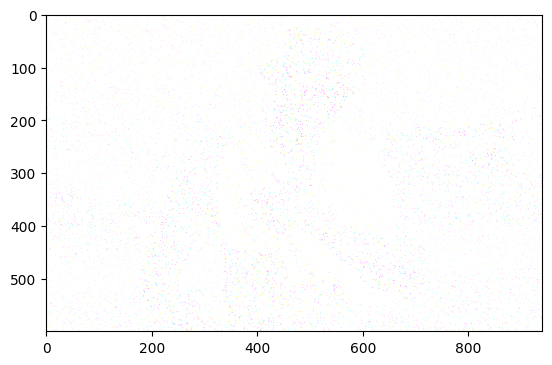

In [10]:
plt.imshow(I)

In [11]:
ni = I.shape[0]
nj = I.shape[1]
nC = I.shape[2]


figure_name='image6'
figure_name_final=folderInput+figure_name+'_mask.tif'
mask_img = cv2.imread(figure_name_final,cv2.IMREAD_UNCHANGED)

In [12]:
mask1 = mask_img >128
mask=mask1.astype('float')

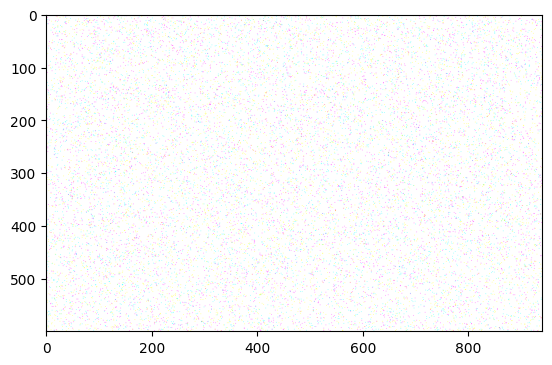

In [13]:
plt.imshow(mask)

In [14]:
param = Parameters(0,0,0,0,0)
param.hi = 1 / (ni-1)
param.hj = 1 / (nj-1)

In [15]:
Iinp = np.zeros(I.shape, dtype=np.float32)
Iinp[:,:,0]=sol_Laplace_Equation_Axb.sol_Laplace_Equation_Axb(I[:,:,0], mask[:,:,0], param)
Iinp[:,:,1]=sol_Laplace_Equation_Axb.sol_Laplace_Equation_Axb(I[:,:,1], mask[:,:,1], param)
Iinp[:,:,2]=sol_Laplace_Equation_Axb.sol_Laplace_Equation_Axb(I[:,:,2], mask[:,:,2], param)

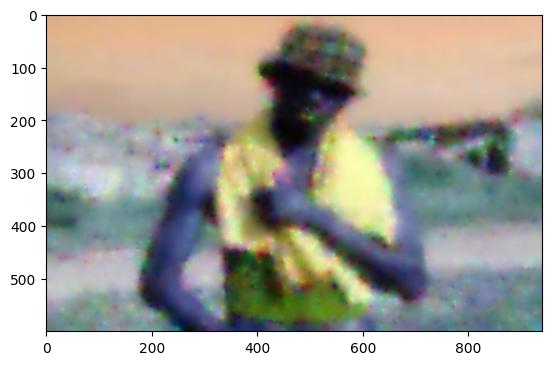

In [16]:
plt.imshow(Iinp)